In [1]:
import pandas as pd

# LOAD AND READ THE SUBWAY DATA
subway_df = pd.read_csv('../data/raw/subway_hr_ridership.csv')
subway_df.head()

/var/folders/ch/bc17btyj5dz4wbcv2s90_kz40000gn/T/ipykernel_1280/144035523.py:4: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  subway_df = pd.read_csv('../data/raw/subway_hr_ridership.csv')


,transit_timestamp,transit_mode,station_complex_id,station_complex,borough,payment_method,fare_class_category,ridership,transfers,latitude,longitude,Georeference
0,03/09/2023 07:00:00 AM,subway,43,Parkside Av (Q),Brooklyn,metrocard,Metrocard - Students,103,7,40.655293,-73.961494,POINT (-73.961494 40.655293)
1,03/09/2023 10:00:00 AM,subway,615,New Utrecht Av (N)/62 St (D),Brooklyn,metrocard,Metrocard - Fair Fare,26,0,40.626472,-73.996350,POINT (-73.99635 40.626472)
2,03/09/2023 09:00:00 AM,subway,396,96 St (6),Manhattan,metrocard,Metrocard - Seniors & Disability,54,8,40.785670,-73.951070,POINT (-73.95107 40.78567)
3,03/09/2023 09:00:00 PM,subway,618,"14 St (A,C,E)/8 Av (L)",Manhattan,metrocard,Metrocard - Unlimited 7-Day,115,0,40.740894,-74.001690,POINT (-74.00169 40.740894)
4,03/09/2023 09:00:00 PM,subway,196,Aqueduct Racetrack (A),Queens,metrocard,Metrocard - Unlimited 7-Day,7,0,40.672096,-73.835920,POINT (-73.83592 40.672096)


In [2]:
print(subway_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66760770 entries, 0 to 66760769
Data columns (total 12 columns):
 #   Column               Dtype  
---  ------               -----  
 0   transit_timestamp    object 
 1   transit_mode         object 
 2   station_complex_id   object 
 3   station_complex      object 
 4   borough              object 
 5   payment_method       object 
 6   fare_class_category  object 
 7   ridership            int64  
 8   transfers            int64  
 9   latitude             float64
 10  longitude            float64
 11  Georeference         object 
dtypes: float64(2), int64(2), object(8)
memory usage: 6.0+ GB
None


In [3]:
# CHECK FOR NULL VALUES
print(subway_df.isnull().sum())

transit_timestamp      0
transit_mode           0
station_complex_id     0
station_complex        0
borough                0
payment_method         0
fare_class_category    0
ridership              0
transfers              0
latitude               0
longitude              0
Georeference           0
dtype: int64


In [4]:
# NO NULL VALUES, SO WE CAN PROCEED WITH DATA EXPLORATION
# LET'S CHECK THE NUMBER OF UNIQUE VALUES IN EACH COLUMN
print(subway_df.nunique())

transit_timestamp      23038
transit_mode               3
station_complex_id       854
station_complex          428
borough                    5
payment_method             2
fare_class_category       12
ridership               7702
transfers               1127
latitude                 464
longitude                464
Georeference             488
dtype: int64


In [5]:
# CATEGORICAL COLUMN FREQUENCIES
categorical_cols = ['transit_mode', 'borough', 'payment_method', 'fare_class_category']

for col in categorical_cols:
    print(f"Value counts for {col}:\n{subway_df[col].value_counts()}\n")

Value counts for transit_mode:
transit_mode
subway                   66244119
staten_island_railway      260948
tram                       255703
Name: count, dtype: int64

Value counts for borough:
borough
Brooklyn         23773949
Manhattan        20436481
Queens           11822146
Bronx            10467244
Staten Island      260950
Name: count, dtype: int64

Value counts for payment_method:
payment_method
metrocard    55355189
omny         11405581
Name: count, dtype: int64

Value counts for fare_class_category:
fare_class_category
OMNY - Full Fare                    9210582
Metrocard - Full Fare               9194114
Metrocard - Unlimited 7-Day         9035427
Metrocard - Unlimited 30-Day        8737086
Metrocard - Other                   8511245
Metrocard - Fair Fare               8087170
Metrocard - Seniors & Disability    7400197
Metrocard - Students                4389950
OMNY - Seniors & Disability         1721666
OMNY - Other                         365515
OMNY - Students    

In [6]:
# NUMERICAL COLUMN STATISTICS
numerical_cols = ['ridership', 'transfers', 'latitude', 'longitude']
print(subway_df[numerical_cols].describe())

          ridership     transfers      latitude     longitude
count  6.676077e+07  6.676077e+07  6.676077e+07  6.676077e+07
mean   4.419692e+01  1.839242e+00  4.073233e+01 -7.393520e+01
std    1.467951e+02  1.154125e+01  7.832160e-02  5.617191e-02
min    1.000000e+00  0.000000e+00  4.057613e+01 -7.407484e+01
25%    4.000000e+00  0.000000e+00  4.067732e+01 -7.398133e+01
50%    1.200000e+01  0.000000e+00  4.072433e+01 -7.394748e+01
75%    3.500000e+01  1.000000e+00  4.079164e+01 -7.389948e+01
max    1.471800e+04  1.354000e+03  4.090313e+01 -7.375540e+01


In [7]:
#@TODO: Taking it a step further, we can write a function to analyze the dataset

# 1. COUNT UNIQUE VALUES FOR EACH COLUMN
# 2. DISPLAY THE TOP 10 MOST FREQUENT VALUES FOR EACH COLUMN

def analyze_dataset(df):
    analysis = {}
    for column in df.columns:
        unique_values = df[column].nunique()
        sample_values = df[column].value_counts().head(10)
        analysis[column] = {
            'unique_values_count': unique_values,
            'sample_values': sample_values.to_dict()
        }
    return analysis

# ANALYZING THE DATASET
dataset_analysis = analyze_dataset(subway_df)

# PRINT THE ANALYSIS
for col, details in dataset_analysis.items():
    print(f"Column: {col}")
    print(f"  Number of unique values: {details['unique_values_count']}")
    print("   Sample Values and Counts:")
    for value, count in details['sample_values'].items():
        print(f"    {value}: {count}")
    print("\n")

Column: transit_timestamp
  Number of unique values: 23038
   Sample Values and Counts:
    09/17/2024 08:00:00 AM: 4030
    09/09/2024 08:00:00 AM: 4027
    09/16/2024 08:00:00 AM: 4025
    09/10/2024 08:00:00 AM: 4023
    09/12/2024 08:00:00 AM: 4010
    09/11/2024 08:00:00 AM: 4001
    09/05/2024 08:00:00 AM: 3990
    09/11/2024 09:00:00 AM: 3971
    09/17/2024 07:00:00 AM: 3969
    09/12/2024 09:00:00 AM: 3967


Column: transit_mode
  Number of unique values: 3
   Sample Values and Counts:
    subway: 66244119
    staten_island_railway: 260948
    tram: 255703


Column: station_complex_id
  Number of unique values: 854
   Sample Values and Counts:
    447: 149847
    611: 149575
    616: 147239
    617: 146181
    610: 146152
    602: 145109
    318: 144648
    607: 144462
    601: 143953
    451: 143035


Column: station_complex
  Number of unique values: 428
   Sample Values and Counts:
    Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,E): 196962
    74-Broadway (7)/Jackson Hts-R

In [8]:
# OPTIMIZE MEMORY USAGE
def optimize_memory(df):
    # CONVERT OBJECT COLUMNS TO CATEGORY WHERE APPROPRIATE
    for col in df.select_dtypes(include=['object']).columns:
        if df[col].nunique() < 0.5 * len(df):  # IF UNIQUE VALUES ARE LESS THAN 50% OF TOTAL ROWS
            df[col] = df[col].astype('category')
    
    # DOWNCAST NUMERICAL COLUMNS
    for col in df.select_dtypes(include=['int', 'float']).columns:
        if df[col].dtype == 'int64':
            df[col] = pd.to_numeric(df[col], downcast='integer')
        elif df[col].dtype == 'float64':
            df[col] = pd.to_numeric(df[col], downcast='float')
    
    return df

# APPLY MEMORY OPTIMIZATION
subway_df = optimize_memory(subway_df)

# CHECK MEMORY USAGE AFTER OPTIMIZATION
print(subway_df.info(memory_usage='deep'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66760770 entries, 0 to 66760769
Data columns (total 12 columns):
 #   Column               Dtype   
---  ------               -----   
 0   transit_timestamp    category
 1   transit_mode         category
 2   station_complex_id   category
 3   station_complex      category
 4   borough              category
 5   payment_method       category
 6   fare_class_category  category
 7   ridership            int16   
 8   transfers            int16   
 9   latitude             float32 
 10  longitude            float32 
 11  Georeference         category
dtypes: category(8), float32(2), int16(2)
memory usage: 1.5 GB
None


In [9]:
# CONVERT transit_timestamp TO DATETIME
subway_df['transit_timestamp'] = pd.to_datetime(subway_df['transit_timestamp'])

# EXTRACT TEMPORAL FEATURES
subway_df['hour'] = subway_df['transit_timestamp'].dt.hour
subway_df['day_of_week'] = subway_df['transit_timestamp'].dt.day_name()
subway_df['month'] = subway_df['transit_timestamp'].dt.month_name()

# DISPLAY THE FIRST FEW ROWS OF NEW COLUMNS
print(subway_df[['transit_timestamp', 'hour', 'day_of_week', 'month']].head())


    transit_timestamp  hour day_of_week  month
0 2023-03-09 07:00:00     7    Thursday  March
1 2023-03-09 10:00:00    10    Thursday  March
2 2023-03-09 09:00:00     9    Thursday  March
3 2023-03-09 21:00:00    21    Thursday  March
4 2023-03-09 21:00:00    21    Thursday  March


Correlation Matrix:
           ridership  transfers  latitude  longitude
ridership   1.000000   0.331042  0.027134  -0.103283
transfers   0.331042   1.000000  0.002195   0.051594
latitude    0.027134   0.002195  1.000000   0.242729
longitude  -0.103283   0.051594  0.242729   1.000000


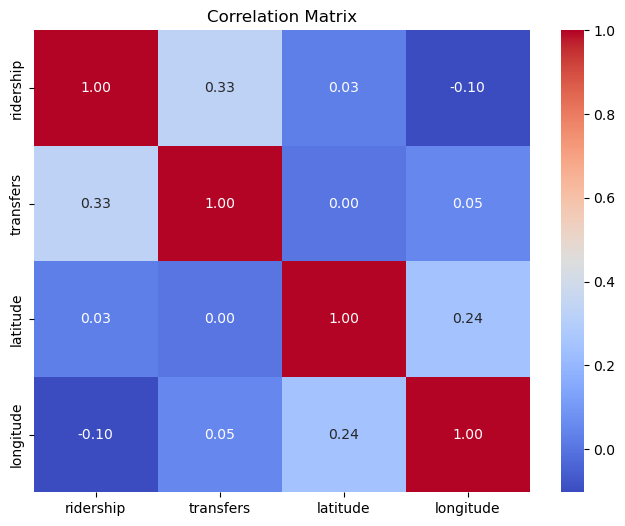

In [10]:
# CORRELATION MATRIX FOR NUMERICAL COLUMNS
numerical_cols = ['ridership', 'transfers', 'latitude', 'longitude']
correlation_matrix = subway_df[numerical_cols].corr()

print("Correlation Matrix:")
print(correlation_matrix)

# VISUALIZE THE CORRELATION MATRIX
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

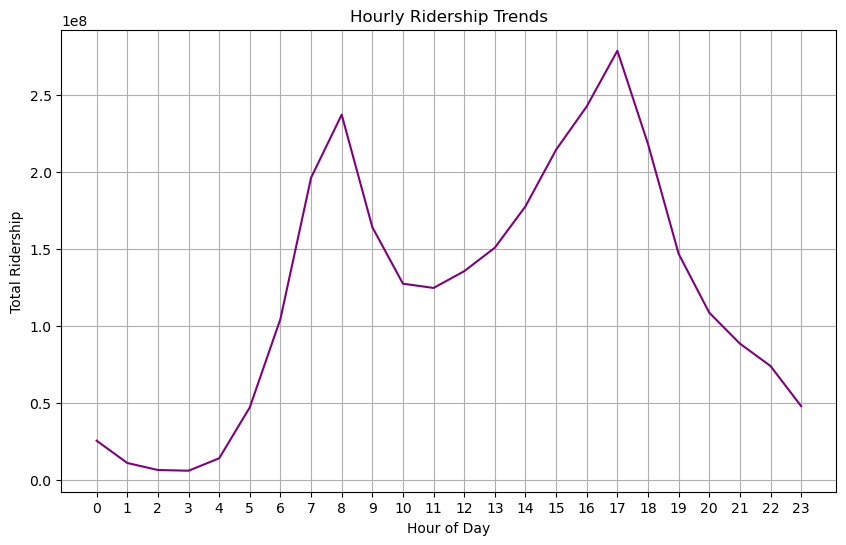

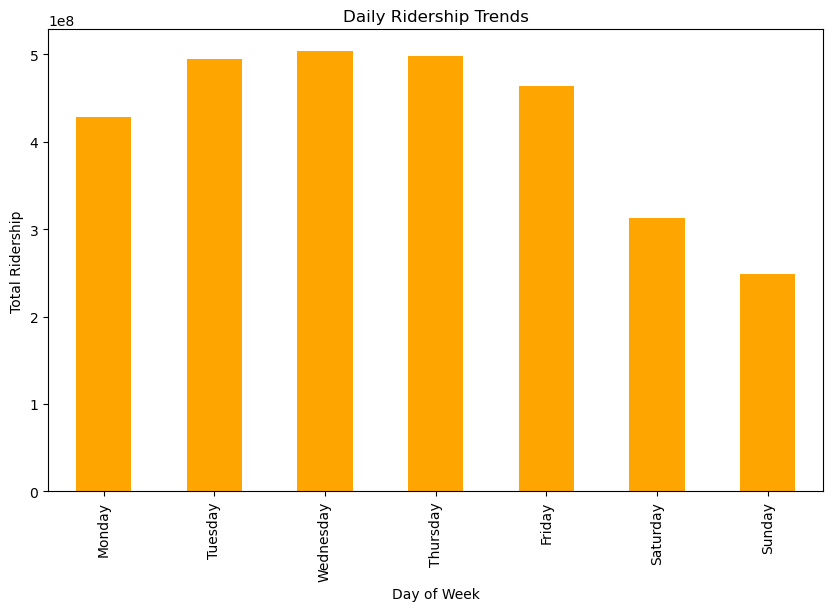

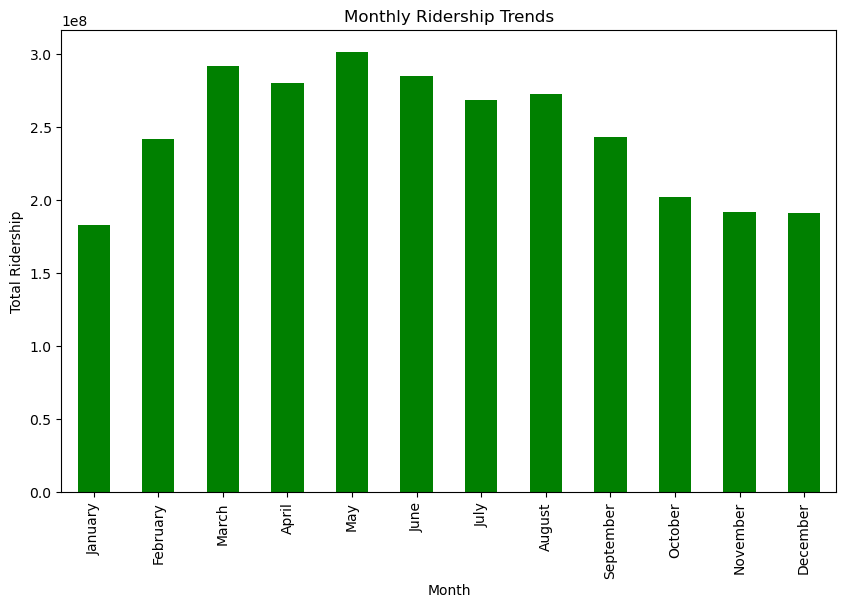

In [11]:
# RIDERSHIP BY HOUR
hourly_ridership = subway_df.groupby('hour')['ridership'].sum()
hourly_ridership.plot(kind='line', figsize=(10, 6), color='purple')
plt.title('Hourly Ridership Trends')
plt.xlabel('Hour of Day')
plt.ylabel('Total Ridership')
plt.xticks(range(0, 24))
plt.grid()
plt.show()

# RIDERSHIP BY DAY OF WEEK
daily_ridership = subway_df.groupby('day_of_week')['ridership'].sum().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])
daily_ridership.plot(kind='bar', figsize=(10, 6), color='orange')
plt.title('Daily Ridership Trends')
plt.xlabel('Day of Week')
plt.ylabel('Total Ridership')
plt.show()

# RIDERSHIP BY MONTH
monthly_ridership = subway_df.groupby('month')['ridership'].sum().reindex([
    'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'
])
monthly_ridership.plot(kind='bar', figsize=(10, 6), color='green')
plt.title('Monthly Ridership Trends')
plt.xlabel('Month')
plt.ylabel('Total Ridership')
plt.show()

In [12]:
# SAVE PROCESSED DATA TO CSV
subway_df.to_csv('../data/processed/subway_cleaned.csv', index=False)

In [2]:
import pandas as pd

# LOAD AND READ THE BUS DATA
bus_df = pd.read_csv('../data/raw/bus_hr_ridership.csv')
bus_df.head()

,transit_timestamp,bus_route,payment_method,fare_class_category,ridership,transfers
0,06/08/2022 10:00:00 AM,BXM8,metrocard,Metrocard - Other,1.991,0.000
1,06/08/2022 10:00:00 AM,M15+,metrocard,Metrocard - Other,45.997,10.000
2,06/08/2022 10:00:00 AM,M2,metrocard,Metrocard - Unlimited 30-Day,34.999,0.000
3,06/08/2022 10:00:00 AM,M20,metrocard,Metrocard - Full Fare,15.026,4.005
4,06/08/2022 10:00:00 AM,M23+,omny,OMNY - Full Fare,59.241,19.045


In [3]:
print(bus_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54589317 entries, 0 to 54589316
Data columns (total 6 columns):
 #   Column               Dtype  
---  ------               -----  
 0   transit_timestamp    object 
 1   bus_route            object 
 2   payment_method       object 
 3   fare_class_category  object 
 4   ridership            float64
 5   transfers            float64
dtypes: float64(2), object(4)
memory usage: 2.4+ GB
None


In [4]:
# CHECK FOR NULL VALUES IN THE BUS DATA
print(bus_df.isnull().sum())

transit_timestamp      0
bus_route              0
payment_method         0
fare_class_category    0
ridership              4
transfers              1
dtype: int64


In [5]:
# LET'S CHECK THE NUMBER OF UNIQUE VALUES IN EACH COLUMN OF THE BUS DATA
print(bus_df.nunique())

transit_timestamp       23037
bus_route                 358
payment_method              2
fare_class_category        12
ridership              388525
transfers              140271
dtype: int64


In [7]:
# CATEGORICAL COLUMN FREQUENCIES OF THE BUS DATA
categorical_cols = ['bus_route', 'payment_method', 'fare_class_category']

for col in categorical_cols:
    print(f"Value counts for {col}:\n{bus_df[col].value_counts()}\n")

Value counts for bus_route:
bus_route
Q10     195954
M15     195567
Q60     194705
Q58     194181
M101    194040
         ...  
Q108      6454
L90       5449
B93       3057
Q92       1527
Q96        159
Name: count, Length: 358, dtype: int64

Value counts for payment_method:
payment_method
metrocard    40302996
omny         14286321
Name: count, dtype: int64

Value counts for fare_class_category:
fare_class_category
OMNY - Full Fare                    7434456
Metrocard - Full Fare               7067776
Metrocard - Unlimited 7-Day         6541457
Metrocard - Unlimited 30-Day        6136974
Metrocard - Other                   6018458
Metrocard - Seniors & Disability    5900007
Metrocard - Fair Fare               5629275
OMNY - Other                        3676641
OMNY - Seniors & Disability         3096845
Metrocard - Students                3009049
OMNY - Students                       75455
OMNY - Fair Fare                       2924
Name: count, dtype: int64



In [10]:
bus_route_counts = bus_df['bus_route'].value_counts()
pd.set_option('display.max_rows', None)
print(bus_route_counts)

bus_route
Q10       195954
M15       195567
Q60       194705
Q58       194181
M101      194040
B15       193694
B6        193543
Q25       193075
Q65       192972
B41       192423
B82       192316
Q27       192301
Q06       192281
Q44+      192066
Q66       191829
Q3        191353
Q17       191161
B46       191154
B35       191113
Q46       190997
B8        190938
Q43       190717
M60+      190652
Q85       190523
Q33       189896
Q111      189877
B44       189540
Q54       189347
M102      189143
Q5        188966
BX36      188747
BX19      188733
Q114      188584
BX9       188446
Q83       188337
Q20A      188300
B12       188130
Q53+      188064
M14D+     187759
BX12      187455
S53       187445
M103      187345
M7        186964
B17       186919
Q59       186889
B38       186832
BX6       186801
B36       186758
B3        186146
B63       186119
Q49       185972
Q24       185953
B61       185829
Q55       185824
Q2        185782
Q56       185599
B68       185581
Q12       185395
M2  

In [13]:
# NUMERICAL COLUMN STATISTICS OF THE BUS DATA
numerical_cols = ['ridership', 'transfers']
print(bus_df[numerical_cols].describe())

          ridership     transfers
count  5.458931e+07  5.458932e+07
mean   1.935202e+01  3.422852e+00
std    3.706026e+01  9.561019e+00
min    0.000000e+00  0.000000e+00
25%    2.100000e-02  0.000000e+00
50%    5.014000e+00  0.000000e+00
75%    2.201000e+01  2.003000e+00
max    1.883114e+03  4.750400e+02


In [14]:
# 3. COUNT UNIQUE VALUES FOR EACH COLUMN
# 4. DISPLAY THE TOP 10 MOST FREQUENT VALUES FOR EACH COLUMN

def analyze_dataset(df):
    analysis = {}
    for column in df.columns:
        unique_values = df[column].nunique()
        sample_values = df[column].value_counts().head(10)
        analysis[column] = {
            'unique_values_count': unique_values,
            'sample_values': sample_values.to_dict()
        }
    return analysis

# ANALYZING THE BUS DATASET
dataset_analysis = analyze_dataset(bus_df)

# PRINT THE ANALYSIS
for col, details in dataset_analysis.items():
    print(f"Column: {col}")
    print(f"  Number of unique values: {details['unique_values_count']}")
    print("   Sample Values and Counts:")
    for value, count in details['sample_values'].items():
        print(f"    {value}: {count}")
    print("\n")

Column: transit_timestamp
  Number of unique values: 23037
   Sample Values and Counts:
    07/11/2024 04:00:00 PM: 3547
    07/08/2024 07:00:00 AM: 3486
    05/01/2024 08:00:00 AM: 3404
    05/01/2024 06:00:00 AM: 3386
    05/01/2024 07:00:00 AM: 3380
    07/01/2024 07:00:00 PM: 3378
    05/01/2024 07:00:00 PM: 3375
    05/01/2024 08:00:00 PM: 3367
    01/31/2024 07:00:00 AM: 3355
    01/22/2024 05:00:00 PM: 3353


Column: bus_route
  Number of unique values: 358
   Sample Values and Counts:
    Q10: 195954
    M15: 195567
    Q60: 194705
    Q58: 194181
    M101: 194040
    B15: 193694
    B6: 193543
    Q25: 193075
    Q65: 192972
    B41: 192423


Column: payment_method
  Number of unique values: 2
   Sample Values and Counts:
    metrocard: 40302996
    omny: 14286321


Column: fare_class_category
  Number of unique values: 12
   Sample Values and Counts:
    OMNY - Full Fare: 7434456
    Metrocard - Full Fare: 7067776
    Metrocard - Unlimited 7-Day: 6541457
    Metrocard - Unlim

In [15]:
# OPTIMIZE MEMORY USAGE OF THE BUS DATA
def optimize_memory(df):
    # CONVERT OBJECT COLUMNS TO CATEGORY WHERE APPROPRIATE
    for col in df.select_dtypes(include=['object']).columns:
        if df[col].nunique() < 0.5 * len(df):  # IF UNIQUE VALUES ARE LESS THAN 50% OF TOTAL ROWS
            df[col] = df[col].astype('category')
    
    # DOWNCAST NUMERICAL COLUMNS
    for col in df.select_dtypes(include=['int', 'float']).columns:
        if df[col].dtype == 'int64':
            df[col] = pd.to_numeric(df[col], downcast='integer')
        elif df[col].dtype == 'float64':
            df[col] = pd.to_numeric(df[col], downcast='float')
    
    return df

# APPLY MEMORY OPTIMIZATION TO THE BUS DATA
bus_df = optimize_memory(bus_df)

# CHECK MEMORY USAGE OF THE BUS DATA AFTER OPTIMIZATION
print(bus_df.info(memory_usage='deep'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54589317 entries, 0 to 54589316
Data columns (total 6 columns):
 #   Column               Dtype   
---  ------               -----   
 0   transit_timestamp    category
 1   bus_route            category
 2   payment_method       category
 3   fare_class_category  category
 4   ridership            float32 
 5   transfers            float32 
dtypes: category(4), float32(2)
memory usage: 731.1 MB
None


In [16]:
# CONVERT transit_timestamp TO DATETIME
bus_df['transit_timestamp'] = pd.to_datetime(bus_df['transit_timestamp'])

# EXTRACT TEMPORAL FEATURES
bus_df['hour'] = bus_df['transit_timestamp'].dt.hour
bus_df['day_of_week'] = bus_df['transit_timestamp'].dt.day_name()
bus_df['month'] = bus_df['transit_timestamp'].dt.month_name()

# DISPLAY THE FIRST FEW ROWS OF NEW COLUMNS
print(bus_df[['transit_timestamp', 'hour', 'day_of_week', 'month']].head())

    transit_timestamp  hour day_of_week month
0 2022-06-08 10:00:00    10   Wednesday  June
1 2022-06-08 10:00:00    10   Wednesday  June
2 2022-06-08 10:00:00    10   Wednesday  June
3 2022-06-08 10:00:00    10   Wednesday  June
4 2022-06-08 10:00:00    10   Wednesday  June


Correlation Matrix:
           ridership  transfers
ridership   1.000000   0.784394
transfers   0.784394   1.000000


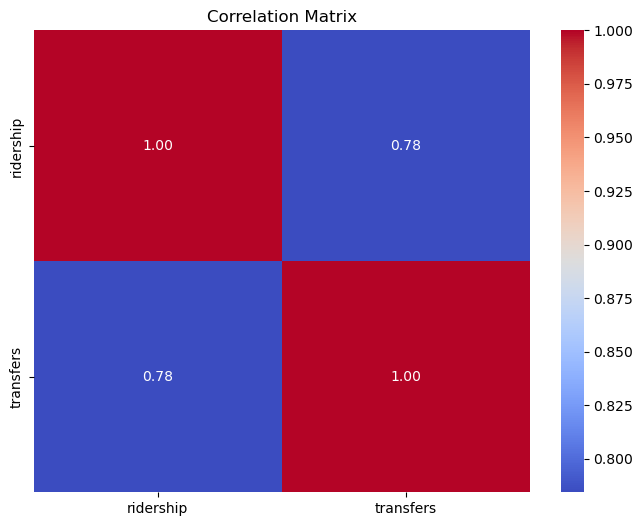

In [17]:
# CORRELATION MATRIX FOR NUMERICAL COLUMNS
numerical_cols = ['ridership', 'transfers']
correlation_matrix = bus_df[numerical_cols].corr()

print("Correlation Matrix:")
print(correlation_matrix)

# VISUALIZE THE CORRELATION MATRIX
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

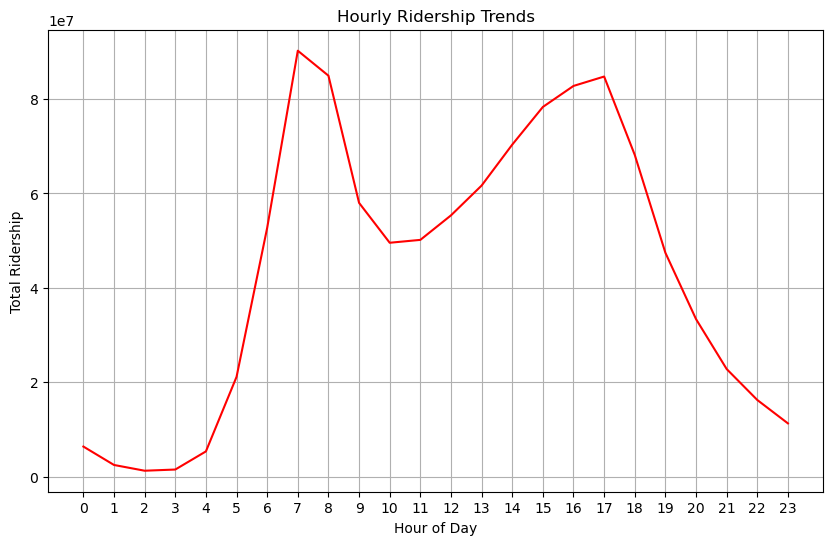

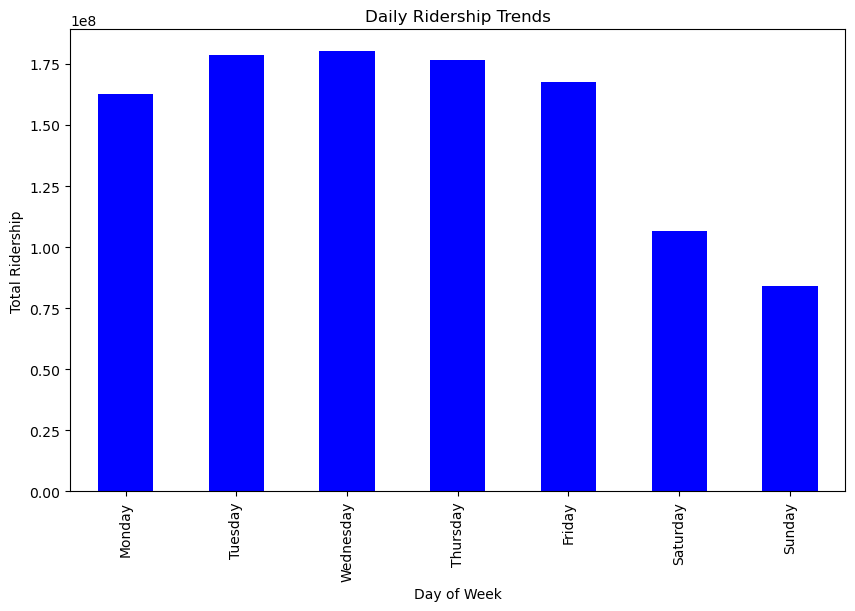

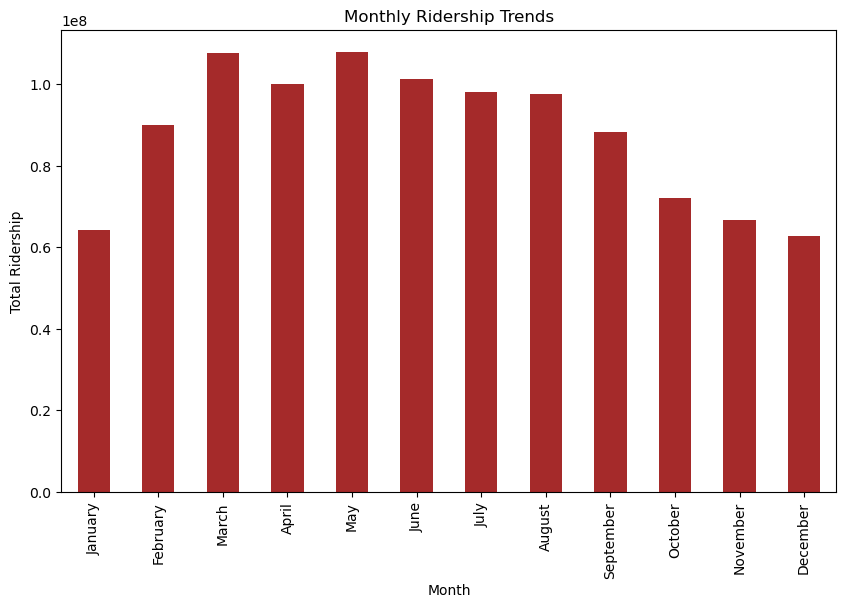

In [19]:
# RIDERSHIP BY HOUR
hourly_ridership = bus_df.groupby('hour')['ridership'].sum()
hourly_ridership.plot(kind='line', figsize=(10, 6), color='red')
plt.title('Hourly Ridership Trends')
plt.xlabel('Hour of Day')
plt.ylabel('Total Ridership')
plt.xticks(range(0, 24))
plt.grid()
plt.show()

# RIDERSHIP BY DAY OF WEEK
daily_ridership = bus_df.groupby('day_of_week')['ridership'].sum().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])
daily_ridership.plot(kind='bar', figsize=(10, 6), color='blue')
plt.title('Daily Ridership Trends')
plt.xlabel('Day of Week')
plt.ylabel('Total Ridership')
plt.show()

# RIDERSHIP BY MONTH
monthly_ridership = bus_df.groupby('month')['ridership'].sum().reindex([
    'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'
])
monthly_ridership.plot(kind='bar', figsize=(10, 6), color='brown')
plt.title('Monthly Ridership Trends')
plt.xlabel('Month')
plt.ylabel('Total Ridership')
plt.show()

In [20]:
# SAVE PROCESSED DATA TO CSV
bus_df.to_csv('../data/processed/bus_cleaned.csv', index=False)